In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import scipy.constants as sc
import os
from scipy.optimize import curve_fit
from pychromatic import Multiplot
from pychromatic.colors import accent

In [2]:
ev_to_j = sc.physical_constants["electron volt-joule relationship"][0]
Av =  sc.physical_constants["Avogadro constant"][0]
A_to_m = 1E-10
kB = sc.physical_constants["Boltzmann constant"][0]

In [3]:
def calculate_cp(folder, T, natoms=4000, mass=63.546, nsims=5):
    cps = []
    for i in tqdm(range(1, nsims+1)):
        pe, ke, etotal, press, vol, temp = np.loadtxt(os.path.join(folder, "data%d.dat"%i), unpack=True)
        efluct = etotal - np.mean(etotal)
        #print(np.mean(temp), np.mean(etotal))
        efluctsq = (efluct*ev_to_j)**2

        cp = np.mean(efluctsq)/(kB*T*T)
        #print(cp)
        w = (natoms/Av)
        #print(w)
        cp = cp/w
        cps.append(cp)
    return np.mean(cps), np.std(cps)

In [4]:
calculate_cp("fluctuations/600", 600)

100%|██████████| 5/5 [00:00<00:00,  5.11it/s]


(26.284880437232665, 0.24833954830899133)

In [5]:
calculate_cp("fluctuations/700", 700)

100%|██████████| 5/5 [00:00<00:00,  6.51it/s]


(26.951785680815345, 0.21875462061910353)

In [6]:
calculate_cp("fluctuations/800", 800)

100%|██████████| 5/5 [00:00<00:00,  6.47it/s]


(27.394143814617838, 0.15964945659775595)

In [7]:
calculate_cp("fluctuations/900", 900)

100%|██████████| 5/5 [00:00<00:00,  6.54it/s]


(27.730719542857848, 0.45342599667488537)

In [8]:
calculate_cp("fluctuations/1000", 1000)

100%|██████████| 5/5 [00:00<00:00,  6.61it/s]


(28.42951820774756, 0.44131356330384963)

In [9]:
calculate_cp("fluctuations/1100", 1100)

100%|██████████| 5/5 [00:00<00:00,  6.29it/s]


(28.990981036966794, 0.10499818029575433)

In [10]:
calculate_cp("fluctuations/1200", 1200)

100%|██████████| 5/5 [00:00<00:00,  6.88it/s]


(29.93892169448203, 0.3232276908902527)

In [4]:
temp = [600, 700, 800, 900, 1000, 1100, 1200]
cp = [26.3, 27.0, 27.4, 27.7, 28.4, 29.0, 29.9]
cperr = [0.3, 0.2, 0.2, 0.5, 0.4, 0.1, 0.3]
exptemp = [400, 450, 500, 550, 600, 650, 700, 800,900,1000, 1100, 1200, 1250, 1300]
expcv = [24.23, 24.44, 24.58, 24.70, 24.79, 24.87, 24.94, 25.03, 25.25, 25.30, 25.57, 25.98, 26.22, 26.80]
expcp = [25.25, 25.61, 25.91, 26.21, 26.48, 26.73, 26.99, 27.48, 28.04, 28.66, 29.48, 30.53, 31.12, 32.16]

In [5]:
expcp2 = [26.464, 26.992, 27.515, 28.088, 28.820, 29.876, 31.446]

In [6]:
expcp3 = [26.464, 26.992, 27.515, 28.088, 28.820, 29.876, 31.446]

Now get from free energy

## Entropy

$$
-S = \bigg ( \frac{dF}{dT} \bigg )_V
$$

In [7]:
tace, face, ferrace = np.loadtxt("/home/users/menonsqr/ace_pt_phase_diagram/long_run/ts-FCC-400-0/temperature_sweep.dat", unpack=True)
team, feam, ferream = np.loadtxt("free_energy/ts-FCC-400-0/temperature_sweep.dat", unpack=True)

Text(0, 0.5, 'S (eV/atom/K)')

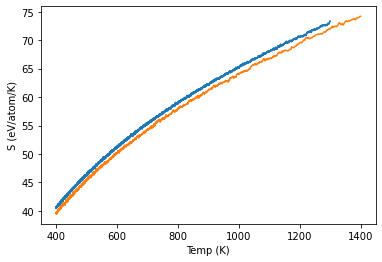

In [8]:
entace = -np.gradient(face, tace)
suace = (entace*ev_to_j)/(1/Av)
enteam = -np.gradient(feam, team)
sueam = (enteam*ev_to_j)/(1/Av)

plt.plot(tace, suace)
plt.plot(team, sueam)
plt.xlabel("Temp (K)")
plt.ylabel("S (eV/atom/K)")

To remove the noise, fit to the Shomate equation

In [9]:
def calc_cfit(t, a, b, c, d, e, f):
    return a*np.log(t) + b*t - c*(t**2)/2 + d*(t**3)/2 + e/(2*t**2) + f 

In [10]:
poptace, pcovace = curve_fit(calc_cfit, tace, suace)
popteam, pcoveam = curve_fit(calc_cfit, team, sueam)

In [11]:
tfit = np.linspace(600, 1201, 10000)

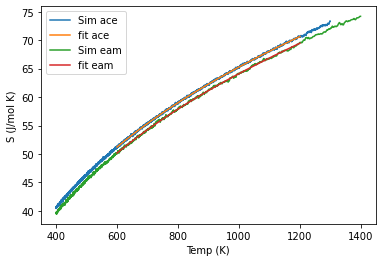

In [12]:
sufitace = calc_cfit(tfit, poptace[0], poptace[1], poptace[2], poptace[3], poptace[4], poptace[5])
sufiteam = calc_cfit(tfit, popteam[0], popteam[1], popteam[2], popteam[3], popteam[4], popteam[5])

plt.plot(tace, suace, label="Sim ace")
plt.plot(tfit, sufitace, label="fit ace")
plt.plot(team, sueam, label="Sim eam")
plt.plot(tfit, sufiteam, label="fit eam")
plt.xlabel("Temp (K)")
plt.ylabel("S (J/mol K)")
plt.legend()

## Calculation of $c_p$ from free energy
$$
-S = \bigg ( \frac{dF}{dT} \bigg )_V
$$

$$
c_p = T\bigg ( \frac{dS}{dT} \bigg )_p
$$

In [13]:
cpace = tfit*np.gradient(sufitace, tfit)
cpeam = tfit*np.gradient(sufiteam, tfit)

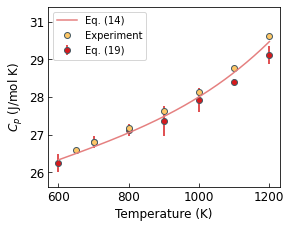

In [15]:
mlt = Multiplot(width=300, ratio=0.8)

mlt[0,0].plot(tfit, cpeam, color=accent["pred"],
             label="Eq. (14)", zorder=10)
mlt[0,0].errorbar(temp, cp, yerr=cperr, marker="o", 
                  ls="", color=accent["lred"], 
                  markeredgecolor=accent["lgrey"],
                  label="Eq. (19)", zorder=5)
mlt[0,0].plot(exptemp[5:-2],expcp[5:-2], 'o', color=accent["pyellow"],
             markeredgecolor=accent["lgrey"],
             zorder=8)
#mlt[0,0].plot(temp, expcp2)
mlt[0,0].plot([1300], [1300], 'o', color=accent["pyellow"],
             markeredgecolor=accent["lgrey"],
             label="Experiment", zorder=100)

#mlt[0,0].plot(tfit, cpace, color=accent["dgreen"],
#             label="Cu ACE fe")
mlt[0,0].legend()
mlt[0,0].set_xlabel("Temperature (K)", fontsize=12)
mlt[0,0].set_ylabel(r"$C_p$ (J/mol K)", fontsize=12)

ticks = np.linspace(600, 1200, 4)
mlt[0,0].set_xticks(ticks)
mlt[0,0].set_xticklabels(["%d"%x for x in ticks], fontsize=12)
mlt[0,0].set_xlim(570, 1230)
mlt[0,0].set_ylim(25.5, 31.5)

ticks = np.linspace(26, 31, 5)
mlt[0,0].set_yticks(ticks)
mlt[0,0].set_yticklabels(["%d"%x for x in ticks], fontsize=12)
plt.savefig("cp_cu.png", dpi=300, bbox_inches="tight")

In [30]:
-3.524+0.007

-3.517

In [29]:
-3.686+0.007

-3.679